<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_08_nn_keras__V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 8: Keras

Estudiante: Alejandra Arciniegas Marín, C.C 1000662159

In [1]:
#@title Importar librerías

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

# 1. Para el dataset make a moon de sklearn, construir un modelo de una red neuronal con keras para clasificar los datos.

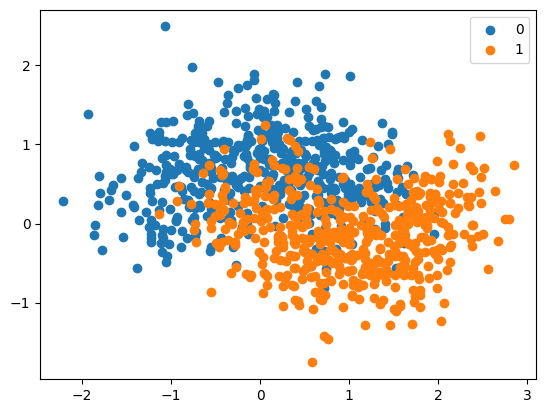

In [12]:
# generación de lunas

X, y = make_moons(n_samples=1000, noise=0.1, random_state=1)

plt.scatter(X[np.where((y==0)),0],X[np.where((y==0)),1], label='0')
plt.scatter(X[np.where((y==1)),0],X[np.where((y==1)),1], label='1')
plt.legend()
plt.show()

In [3]:
#@title Primer intento utilizando en la primera capa una función de activación relu

# Creación del modelo
def build_model2(activation = 'sigmoid', loss='binary_crossentropy'): #La final es una sigmoide al ser un algoritmo de clasificación binaria
  model = keras.models.Sequential()

  model.add(keras.layers.Dense(4, input_dim=2, activation='relu')) #primera capa activada con relu al igual que las ocultas
  model.add(keras.layers.Dense(8, activation='relu'))
  model.add(keras.layers.Dense(6, activation='relu'))

  model.add(keras.layers.Dense(1, activation = activation))

  opt = keras.optimizers.SGD(learning_rate=0.01)
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  return model


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/600
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7569 - loss: 0.6724 - val_accuracy: 0.8100 - val_loss: 0.6671
Epoch 2/600
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8258 - loss: 0.6655 - val_accuracy: 0.8320 - val_loss: 0.6627
Epoch 3/600
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8317 - loss: 0.6639 - val_accuracy: 0.8320 - val_loss: 0.6583
Epoch 4/600
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8426 - loss: 0.6593 - val_accuracy: 0.8360 - val_loss: 0.6540
Epoch 5/600
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8699 - loss: 0.6530 - val_accuracy: 0.8500 - val_loss: 0.6495
Epoch 6/600
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8778 - loss: 0.6469 - val_accuracy: 0.8500 - val_loss: 0.6448
Epoch 7/600
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8693 - loss: 0.6430 - val_accuracy: 0.8480 - val_loss: 0.6399
Epoch 8/600
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8616 - loss: 0.6394 - val_accuracy: 0.8480

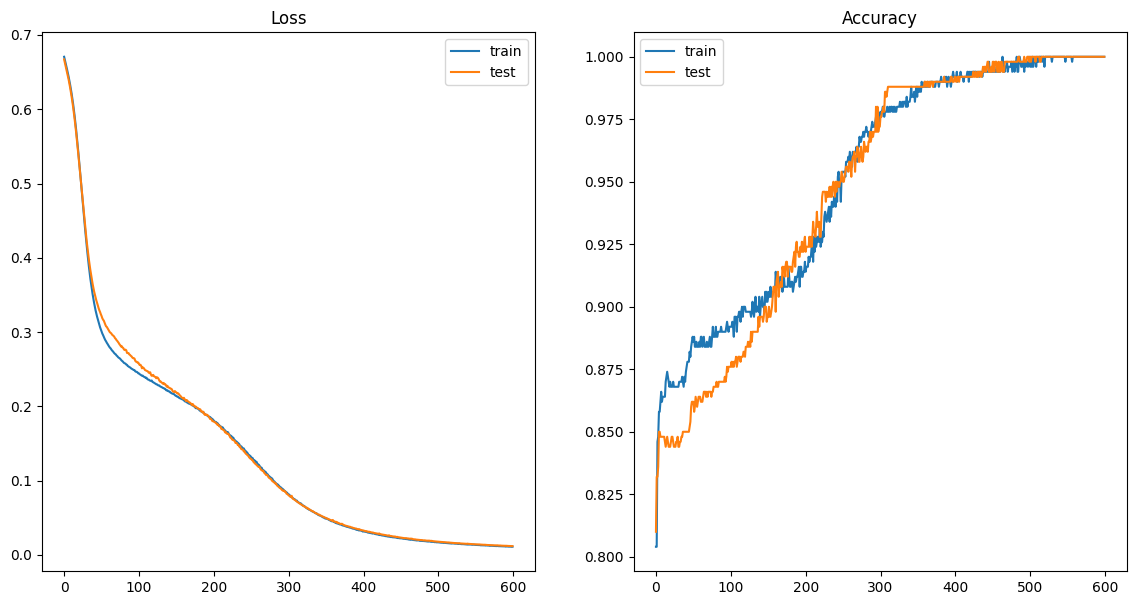

In [4]:
# binary cross entropy:
keras.backend.clear_session()
# Prerprocesado de los datos
n_train = 500
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]
model = build_model2()
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=600, verbose=1)
# Evaluación del modelo
_, train_acc = model.evaluate(train_X, train_y, verbose=0)
_, test_acc = model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Gráficas:
plt.figure(figsize=(14,7))
# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# Gráfica de las precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Se puede ver que con las funciones de activación usadas y la cantidad de neuronas en cada capa,la pérdida en los datos de entrenamiento y de prueba es casi igual en todas las iteraciones, lo cual es un indicador de que el modelo obtenido es bueno. Además, se puede ver como el accurancy de los datos de entrenamiento y de prueba comienzan a converger al final, tienen una variabilidad pequeña y son cercanos a uno, lo cual indica también que hay un buen ajuste sin underfitting ni overfitting.

In [5]:
#@title Segundo intento utilizando en la primera capa una función de activación lineal

# Creación del modelo
def build_model2(activation = 'sigmoid', loss='binary_crossentropy'): #La final es una sigmoide al ser un algoritmo de clasificación binaria
  model = keras.models.Sequential()

  model.add(keras.layers.Dense(4, input_dim=2, activation='linear')) #Primera capa activada linealmente y las ocultas con relu
  model.add(keras.layers.Dense(8, activation='relu'))
  model.add(keras.layers.Dense(6, activation='relu'))

  model.add(keras.layers.Dense(1, activation = activation))

  opt = keras.optimizers.SGD(learning_rate=0.01)
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  return model


Epoch 1/1200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6291 - loss: 0.6886 - val_accuracy: 0.7820 - val_loss: 0.6799
Epoch 2/1200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7843 - loss: 0.6764 - val_accuracy: 0.7820 - val_loss: 0.6718
Epoch 3/1200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7502 - loss: 0.6723 - val_accuracy: 0.7800 - val_loss: 0.6668
Epoch 4/1200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7698 - loss: 0.6654 - val_accuracy: 0.7720 - val_loss: 0.6621
Epoch 5/1200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7679 - loss: 0.6621 - val_accuracy: 0.7680 - val_loss: 0.6573
Epoch 6/1200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7736 - loss: 0.6560 - val_accuracy: 0.7700 - val_loss: 0.6523
Epoch 7/1200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7941 - loss: 0.6519 - val_accuracy: 0.7780 - val_loss: 0.6470
Epoch 8/1200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8004 - loss: 0.6464 - val_accuracy: 0

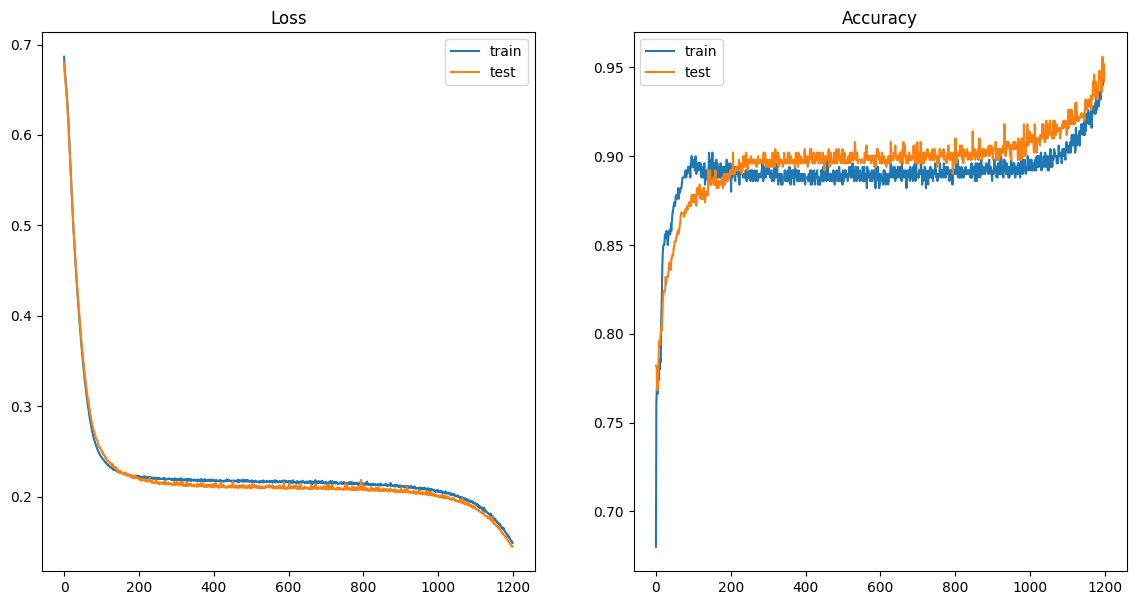

In [6]:
# binary cross entropy:
keras.backend.clear_session()
# Prerprocesado de los datos
n_train = 500
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]
model = build_model2()
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=1200, verbose=1)
# Evaluación del modelo
_, train_acc = model.evaluate(train_X, train_y, verbose=0)
_, test_acc = model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Gráficas:
plt.figure(figsize=(14,7))
# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# Gráfica de las precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

De este segundo intento se puede ver que en general, también hay un buen ajuste, las pérdidas de los datos de prueba y de entrenamiento son casi iguales en todas las iteraciones y además el accurancy también es bastante cercano en los datos de prueba y entrenamiento y están bien comportados, convergiendo al 1. Sin embargo, se puede ver que en este segundo caso se requieren más iteraciones para que el accurancy de los datos de prueba y entrenamiento comencen a converger, lo cual tiene impacto en el costo computacional.

# 2. Para el dataset load digits, construir un modelo de red neuronal empleando keras para realizar la clasificación.

In [50]:
#Importar el dataset de los dígitos
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape

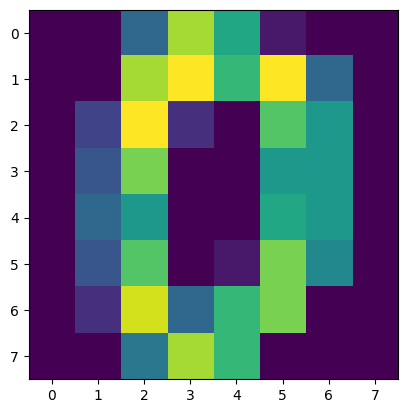

In [51]:
#Mostrar uno de los dígitos
plt.imshow(X[0].reshape(8, 8))

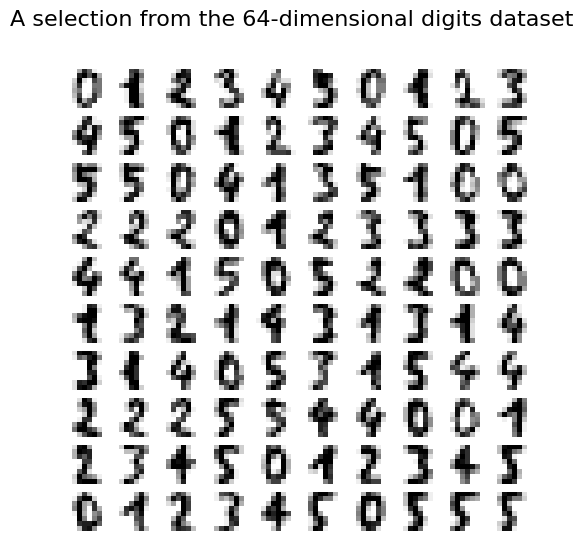

In [52]:
#Mostrar una parte del dataset de dígitos y elegir los datos de test y entrenamiento
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Creación del modelo
def build_model2(activation = 'softmax', loss='categorical_crossentropy'): #La final es una softmax al ser un algoritmo de clasificación multivariado, aquí la función de perdida es categorical_crossentropy
  model = keras.models.Sequential()

  model.add(keras.layers.Dense(8, input_dim=64, activation='relu')) #primera capa activada con relu al igual que las ocultas
  model.add(keras.layers.Dense(8, activation='relu'))
  model.add(keras.layers.Dense(8, activation='relu'))


  model.add(keras.layers.Dense(6, activation = activation))

  opt = keras.optimizers.SGD(learning_rate=0.001)
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  return model

Epoch 1/1200
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2206 - loss: 3.5491 - val_accuracy: 0.2396 - val_loss: 2.0023
Epoch 2/1200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2815 - loss: 1.9041 - val_accuracy: 0.3088 - val_loss: 1.7065
Epoch 3/1200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3215 - loss: 1.6404 - val_accuracy: 0.3410 - val_loss: 1.5632
Epoch 4/1200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3604 - loss: 1.5167 - val_accuracy: 0.3871 - val_loss: 1.4873
Epoch 5/1200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4183 - loss: 1.4787 - val_accuracy: 0.4009 - val_loss: 1.4241
Epoch 6/1200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4379 - loss: 1.3929 - val_accuracy: 0.4424 - val_loss: 1.3696
Epoch 7/1200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4606 - loss: 1.3520 - val_accuracy: 0.4931 - val_loss: 1.3325
Epoch 8/1200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4721 - loss: 1.3633 - val_accuracy: 0

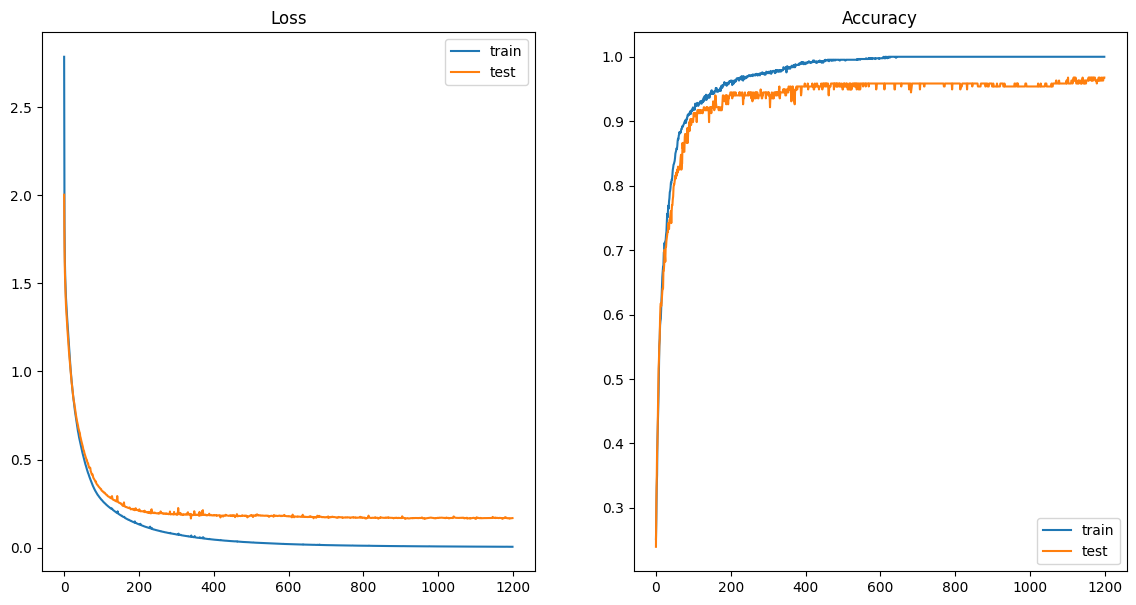

In [54]:
# Convertir las etiquetas a one-hot encoded
y_train = keras.utils.to_categorical(y_train, num_classes=6)
y_test = keras.utils.to_categorical(y_test, num_classes=6)

model = build_model2()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1200, verbose=1)
# Evaluación del modelo
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Gráficas:
plt.figure(figsize=(14,7))
# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# Gráfica de las precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Para esta red, fue necesario disminuir la tasa de aprendizaje del algoritmo ya que los resultados estaban teniendo una alta variabilidad, pero ya al haberla disminuido y con las funciones de activación dadas, se logró una buen accurancy una perdida bien comportada en los datos. También se puede ver que los valores del accurancy de los datos de entrenamiento y los de prueba están bastante cercanos y además muy cercanos a uno, lo que también muestra, un buen ajuste.